In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
import mlflow
import mlflow.sklearn

In [50]:
import dagshub

In [1]:
import dagshub
import mlflow

dagshub.init(
    repo_owner='Sandhya234-wq',
    repo_name='Flight-Price-and-Customer-Satisfaction', 
    mlflow=True
)



mlflow.set_tracking_uri('https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow')



Accessing as Sandhya234-wq

Initialized MLflow to track repo "Sandhya234-wq/Flight-Price-and-Customer-Satisfaction"

Repository Sandhya234-wq/Flight-Price-and-Customer-Satisfaction initialized!

In [52]:
df = pd.read_csv("G:\GitDemo\Flight_ML_Project\Passenger_Satisfaction.csv")  # replace with your file name


<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\hp\AppData\Local\Temp\ipykernel_11308\1075657940.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("G:\GitDemo\Flight_ML_Project\Passenger_Satisfaction.csv")  # replace with your file name


In [53]:
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [54]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [55]:
# Encode target
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1,'neutral or dissatisfied': 0})

In [56]:
print(df.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [57]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_11308\2584395854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)


In [58]:
df.isnull().sum().sum()

np.int64(0)

In [59]:
df.duplicated().sum().sum()

np.int64(0)

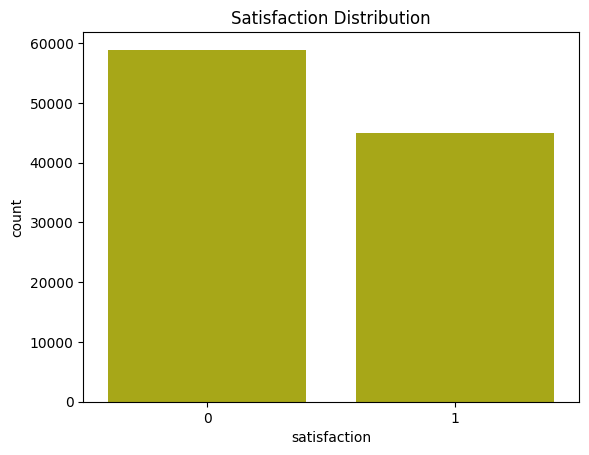

In [60]:
# Satisfaction distribution
color=['r','y']
sns.countplot(x='satisfaction', data=df, color=color[1])
plt.title("Satisfaction Distribution")
plt.show()

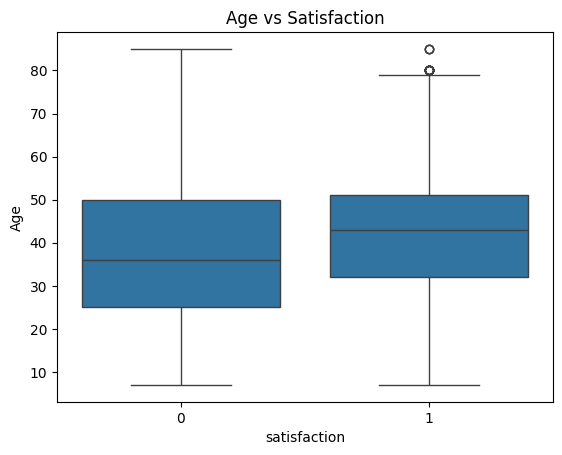

In [61]:
# Age distribution by satisfaction
sns.boxplot(x='satisfaction', y='Age', data=df)
plt.title("Age vs Satisfaction")
plt.show()

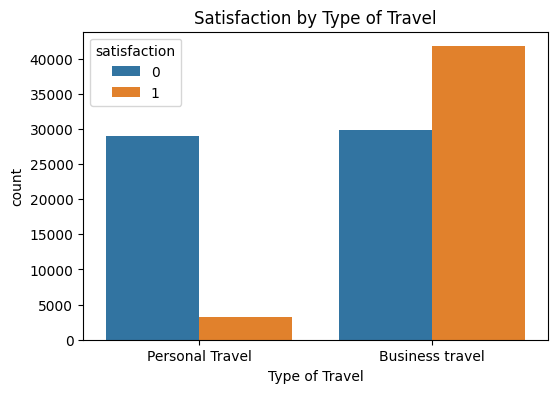

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')
plt.title("Satisfaction by Type of Travel")
plt.show()


In [63]:
x = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [64]:
cat_cols = x.select_dtypes(include='object').columns.tolist()
num_cols = x.select_dtypes(include='number').columns.tolist()

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [67]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "GradientBoosting": GradientBoostingClassifier()
}

In [68]:
import mlflow

In [69]:
if mlflow.active_run():
    mlflow.end_run()

In [70]:
mlflow.set_experiment("Passenger_Satisfaction_Classification")

2025/07/08 20:37:00 INFO mlflow.tracking.fluent: Experiment with name 'Passenger_Satisfaction_Classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/af3b09c3cabd44f88d4f28daa3cd0af6', creation_time=1751987221833, experiment_id='0', last_update_time=1751987221833, lifecycle_stage='active', name='Passenger_Satisfaction_Classification', tags={}>

In [71]:
import mlflow
print(mlflow.get_tracking_uri())


https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow


In [72]:
for Customer, model in models.items():
    with mlflow.start_run(run_name=Customer):
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])

🏃 View run LogisticRegression at: https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow/#/experiments/0/runs/100141ab3bca49b09ff0de5ef2283225
🧪 View experiment at: https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow/#/experiments/0
🏃 View run RandomForest at: https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow/#/experiments/0/runs/30c9106035af4abda960644bbd17888d
🧪 View experiment at: https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow/#/experiments/0
🏃 View run GradientBoosting at: https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow/#/experiments/0/runs/870c9390df1c4c2e9dec7da121df4b45
🧪 View experiment at: https://dagshub.com/Sandhya234-wq/Flight-Price-and-Customer-Satisfaction-Prediction_r.mlflow/#/experiments/0


In [73]:
 # Train
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [74]:
# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [75]:
 # Logging
mlflow.log_param("model", Customer)
mlflow.log_metric("accuracy", acc)
mlflow.log_metric("f1_score", f1)

In [77]:
best_model = RandomForestClassifier(n_estimators=100)
pipeline_final = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

In [78]:
pipeline_final.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [79]:
import joblib 

In [81]:
joblib.dump(pipeline, "Customer-Satisfaction_1")

['Customer-Satisfaction_1']